<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h2>Homework - Feature Engineering</h2>
<h4>DAT-5303 | Machine Learning</h4>

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

**Team: TEAM 8**
<br>
Name: Giuseppe Almerico, Hirokazu Kobayashi, Joan Sottie, Mary Marmolejo, Purvesh Chitre

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<h3>Step 1: Hypothesize on Features to Engineer</h3><br>
Write a 2-3 sentence hypothesis on the effect you believe each new feature will have on the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>) in a markdown cell.

Our hypothesis are based on analyzing the available data set and searching for potential correlations between variables. We developed three engineered features:
<br>
1. **Square Feet Area:** We believe that the net area of the house (Lot_Area minus the sum of the areas) is a key variable that can affect the price.
<br>
2. **House Health:** We believe that the overall quality of the house can influence the final price, so we created a ratio of Overall Quality (60%) and House Condition (40%).
<br>
3. **Plus Value:** Finally, we believe that the combination of optional features in a house can impact the price. We created a feature based on the sum of total bathrooms, mas vnr area, garage cars, and fireplaces.

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 2: Code the New Features</h3><br>
Use the code cell below to develop the features you have hypothesized.

In [1]:
# importing libraries

import pandas            as pd   # data science essentials
import matplotlib.pyplot as plt  # essential graphical output
import seaborn           as sns  # enhanced graphical output

# importing machine learning models
from sklearn.tree     import DecisionTreeRegressor     # regression trees
from sklearn.ensemble import RandomForestRegressor     # random forest
from sklearn.ensemble import GradientBoostingRegressor # gbm

# importing machine learning tools
from sklearn.model_selection import train_test_split   # train-test split
from sklearn.tree            import plot_tree          # tree plots


# ***************************************************************************************************


# specifying file name

file = './__datasets/Ames Housing Dataset.xlsx'


# reading the file into Python

housing = pd.read_excel(io = file)


# ***************************************************************************************************

# 1st Feauture " Square Feet Area" (Sum of selected areas)

housing['Sq_ft_area'] = housing['Gr_Liv_Area'] + housing['Total_Bsmt_SF'] + housing['Garage_Area']\
                     + housing['First_Flr_SF'] + housing['Second_Flr_SF'] + housing['Porch_Area']


# 2nd Feauture "House health" is the sum of scores of overall qual and overal cond in -
# - the proportion of 60:40 respectively

housing['House_health'] = (housing['Overall_Qual']) * 0.6 + (housing['Overall_Cond']) * 0.4


# 3rd Feature created with various datasets

# Step 1 placeholder variable creation " has Mas Vnr"

housing['has_Mas_Vnr']  = 0


# change values in the new feature columns

for index, value in housing.iterrows():

    # has_Mas_Vnr
    
    if housing.loc[index, 'Mas_Vnr_Area'] > 0:
        housing.loc[index, 'has_Mas_Vnr'] = 1

        
# Step 2 total bathrooms

housing['Total_Bath'] = housing['Full_Bath'] + (housing['Half_Bath'] / 2)


# Step 3  "Plus value" gathering all the created sub-features in we which have -
# - Fireplaces, has Mas Vnr, Garage cars, Total bath

housing['Plus_Value'] = housing['Fireplaces'] + housing['has_Mas_Vnr'] \
                       + housing['Garage_Cars'] + housing['Total_Bath']


# housing log sale price
housing['Log_Sale_Price'] = np.log(housing['Sale_Price'])


# compalinig all our conditions together to get one dataset

new_data = ['Sale_Price',
            'Log_Sale_Price', 
            'Sq_ft_area',
            'House_health', 
            'Plus_Value']


# ***************************************************************************************************



<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 3: Check the Results</h3><br>
Develop a correlation matrix or a heatmap to show the linear relationships between your five new features and the response variables (<em>Sale_Price</em> AND <em>log_Sale_Price</em>).

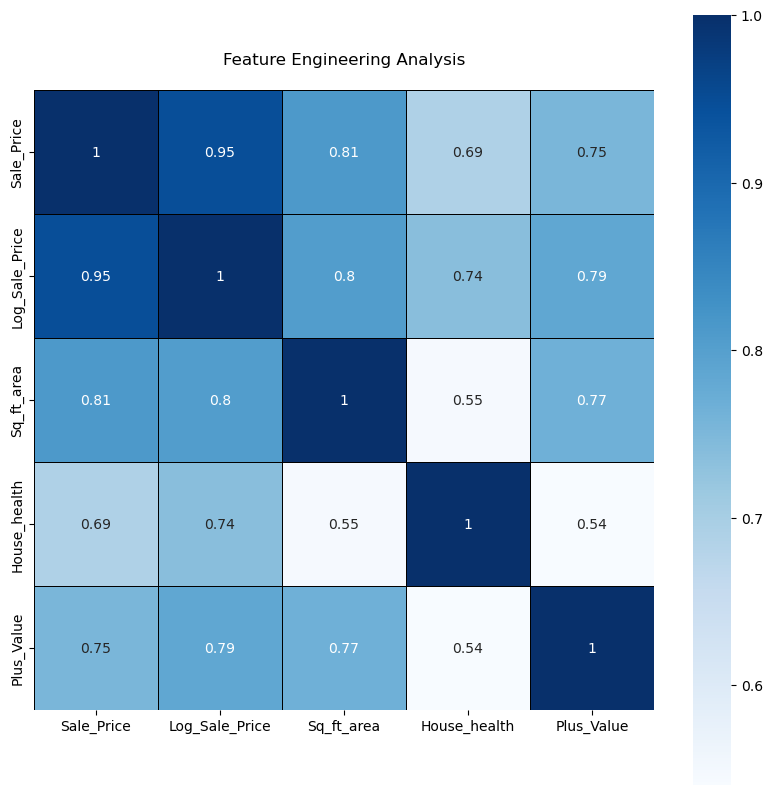

,Sq_ft_area,House_health,Plus_Value,Sale_Price
0,5192.0,5.6,6.0,215000
1,3664.0,5.4,2.0,105000
2,4728.0,6.0,3.5,172000
3,6852.0,6.2,6.5,244000
4,4914.0,5.0,5.5,189900


In [98]:
# developing a correlation matrix based on continuous features

housing_corr = housing[new_data].corr(method = 'pearson')


# filtering the results to only show correlations with Sale_Price

housing_corr.loc[ : , : ].round(decimals = 2)


# specifying plot size (making it bigger)

fig, ax = plt.subplots( figsize = (10 , 10) )


# developing a freezing cold heatmap

sns.heatmap(data       = housing_corr , # the correlation matrix
            cmap       = 'Blues'      , # changing to blue colors
            square     = True         , # tightening the layout
            annot      = True         , # should there be numbers in the heatmap
            linecolor  = 'black'      , # lines between boxes
            linewidths = 0.5          ) # how thick should the lines be


# title and displaying the plot

plt.title(label = """Feature Engineering Analysis\n""")


# rendering the visualization

plt.show(block = True)


# showing the new created temporary columns for the data analysis

housing[['Sq_ft_area', 'House_health', 'Plus_Value', 'Sale_Price']].head(n=5)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<h3>Step 4: Explain the Results</h3><br>
Did your engineered features have the effect that was expected? Explain in 1-2 sentences for each engineered feature.

Based on the correlation analysis performed, the results confirmed our hypotheses (H1-H2-H3).

1) **Square Feet Area :** the correlation shows a value of 0.81(Sale Price) and 0.80(Log Sale Price)

2) **House Health :** In the second case, the correlation demonstrates a value of 0.69(Sale Price) and 0.74(Log Sale Price)

3) **Plus Value :** Finally, the last feature demonstrates a correlation of 0.75(Sale Price) and 0.79 (Log Sale Price).